# Problem Statement:
The dataset is in Zipped format, we have to extract the dataset in the program, visualize the number of
male and female babies born in a particular year, and find out popular baby names

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
names1880 = pd.read_csv('H:\Intellipaat data science\Mahcine learning intellipaat\Assignments\Analyzing baby names\yob1880.txt',
                        names=['name', 'sex', 'births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
#Combining all the available data

years = range(1880, 2020)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'H:\Intellipaat data science\Mahcine learning intellipaat\Assignments\Analyzing baby names\yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989587,Zyheem,M,5,2019
1989588,Zykel,M,5,2019
1989589,Zyking,M,5,2019
1989590,Zyn,M,5,2019


In [5]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

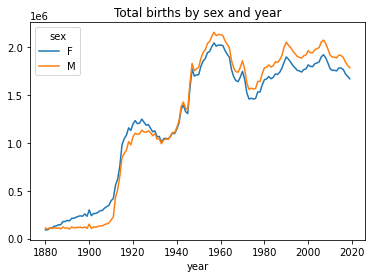

In [6]:
total_births.plot(title='Total births by sex and year')

In [7]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989587,Zyheem,M,5,2019,0.000003
1989588,Zykel,M,5,2019,0.000003
1989589,Zyking,M,5,2019,0.000003
1989590,Zyn,M,5,2019,0.000003


In [8]:
names.groupby(['year', 'sex']).prop.sum() 

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2017  M      1.0
2018  F      1.0
      M      1.0
2019  F      1.0
      M      1.0
Name: prop, Length: 280, dtype: float64

In [9]:
def get_top100(group):
    return group.sort_values(by='births', ascending=False)[:100]

top100 = names.groupby(['year', 'sex']).apply(get_top100)
# Drop the group index, not needed
top100.reset_index(inplace=True, drop=True)
top100

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
27995,Evan,M,3952,2019,0.002213
27996,Kayden,M,3900,2019,0.002184
27997,Parker,M,3893,2019,0.002180
27998,Wesley,M,3748,2019,0.002099


In [10]:
boys = top100[top100.sex == 'M']
girls = top100[top100.sex == 'F']

total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()
total_births.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Columns: 848 entries, Aaliyah to Zoey
dtypes: float64(848)
memory usage: 928.6 KB


name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adeline,Adrian,Agnes,...,Willow,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,NaN,473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,NaN,424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,NaN,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,NaN,623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,NaN,703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
total_birthsbygender = top100.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_birthsbygender.info()
total_birthsbygender.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F       140 non-null    int64
 1   M       140 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


sex,F,M
year,,
1880,69652,88545
1881,70415,80850
1882,82038,90505
1883,84822,83664
1884,96415,90664


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

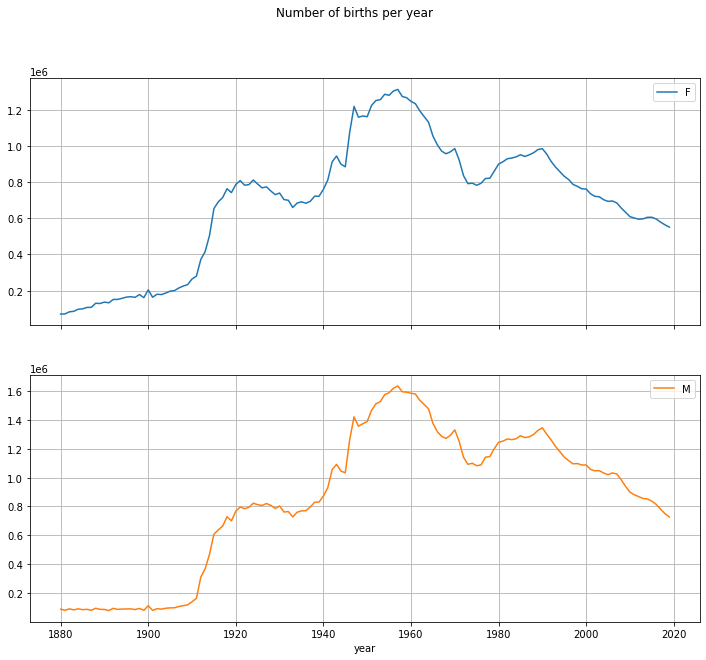

In [13]:
subset = total_birthsbygender[['F','M']]
subset.plot(subplots=True, grid=True, figsize=(12, 10), title='Number of births per year')

In [14]:
#Popular baby names
def get_top100(group):
    return group.sort_values(by='births', ascending=False)[:100]

top100 = names.groupby(['year', 'sex']).apply(get_top100)
# Drop the group index, not needed
top100.reset_index(inplace=True, drop=True)
top100

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
27995,Evan,M,3952,2019,0.002213
27996,Kayden,M,3900,2019,0.002184
27997,Parker,M,3893,2019,0.002180
27998,Wesley,M,3748,2019,0.002099


In [21]:
top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    28000 non-null  object 
 1   sex     28000 non-null  object 
 2   births  28000 non-null  int64  
 3   year    28000 non-null  int64  
 4   prop    28000 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [24]:
#Top 5 baby names
top100['name'].value_counts()

Willie       143
Joseph       140
Daniel       140
Elizabeth    140
John         140
            ... 
Cassidy        1
Colby          1
Brad           1
Charlene       1
Declan         1
Name: name, Length: 848, dtype: int64